In [ ]:
%pip install bokeh


Note: you may need to restart the kernel to use updated packages.


In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, FactorRange, Slope
from bokeh.io import output_notebook
from bokeh.palettes import Sunset10

output_notebook()

Loading BokehJS ...

In [178]:
df = pd.read_csv('../data/UNPopulation_Statistics.csv', encoding='latin1')

In [184]:
df.head()

,T02,"Population, density and surface area",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),"6,985.60",NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,"3,514.41",NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,"3,471.20",NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.2,NaN,"United Nations Population Division, New York, ..."


In [179]:
df1 = pd.read_csv('../data/UNPopulation_Statistics.csv', encoding='latin1', skiprows=1)

In the above, `python skiprows=1` is used to ensure that the row labelled 'T02', followed by 'Population, density and surface area' and 'Unnamed: [number]',  doesn't appear.


In [180]:
df1.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),"6,985.60",NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,"3,514.41",NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,"3,471.20",NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.2,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.1,NaN,"United Nations Population Division, New York, ..."


I have also renamed the columns appropriately with the `.rename` method:
- `Region/Country/Area` is now `LocationID`
- `Unnamed: 1` is now `Region/Country/Area`


In [181]:
df1 = df1.rename(columns={'Region/Country/Area' : 'LocationID', 'Unnamed: 1': 'Region/Country/Area'})
df1.head()

,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),"6,985.60",NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,"3,514.41",NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,"3,471.20",NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.2,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.1,NaN,"United Nations Population Division, New York, ..."


In [182]:
df1[['Footnotes']] = df1[['Footnotes']].fillna('None').astype(str)
#Filling NaN with 'None' as a string
df1.sample(12)


,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source
2792,232,Eritrea,2010,Sex ratio (males per 100 females),96.7,None,"United Nations Population Division, New York, ..."
2639,212,Dominica,2022,Population mid-year estimates for females (mil...,0.04,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6215,688,Serbia,2010,Population mid-year estimates for females (mil...,3.97,Excluding Kosovo.,"United Nations Population Division, New York, ..."
2336,384,Côte dIvoire,2015,Population aged 0 to 14 years old (percentage),43.6,None,"United Nations Population Division, New York, ..."
186,18,Southern Africa,2015,Population aged 60+ years old (percentage),7.8,None,"United Nations Population Division, New York, ..."
416,142,Asia,2015,Sex ratio (males per 100 females),104.1,None,"United Nations Population Division, New York, ..."
4755,583,Micronesia (Fed. States of),2022,Population aged 0 to 14 years old (percentage),30.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
5384,158,Other non-specified areas,2022,Sex ratio (males per 100 females),98,"For statistical purposes, the data for China d...","United Nations Population Division, New York, ..."
755,9,Oceania,2021,Sex ratio (males per 100 females),100.6,None,"United Nations Population Division, New York, ..."
2056,148,Chad,2021,Surface area (thousand km2),"1,284",None,"United Nations Statistics Division, New York, ..."


In [183]:
df1.describe(include = 'all')

,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source
count,7652.000000,7652,7652.000000,7652,7652,7652,7652
unique,NaN,268,NaN,8,3072,105,3
top,NaN,Zimbabwe,NaN,Population density,0,None,"United Nations Population Division, New York, ..."
freq,NaN,29,NaN,1060,102,4500,4228
mean,394.830240,NaN,2017.089911,NaN,NaN,NaN,NaN
std,264.607336,NaN,4.829739,NaN,NaN,NaN,NaN
min,1.000000,NaN,2010.000000,NaN,NaN,NaN,NaN
25%,152.000000,NaN,2015.000000,NaN,NaN,NaN,NaN
50%,398.000000,NaN,2021.000000,NaN,NaN,NaN,NaN
75%,626.000000,NaN,2021.000000,NaN,NaN,NaN,NaN


In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LocationID           7652 non-null   int64 
 1   Region/Country/Area  7652 non-null   object
 2   Year                 7652 non-null   int64 
 3   Series               7652 non-null   object
 4   Value                7652 non-null   object
 5   Footnotes            7652 non-null   object
 6   Source               7652 non-null   object
dtypes: int64(2), object(5)
memory usage: 418.6+ KB


The above shows that the `Values` column, which contains population figures, is displaying those figures as string data types, rather than numeric, and thus displays 'NaN' when using `.describe`. This needs to be changed so that the data in this column can be visualized. The first code below uses `str.replace` to delete commas in numerical figures, because Pandas treats commas as strings instead of numeric values. Only then, with the second code below, are the values then able to be converted to a float data type, with `errors='coerce'` catching any potential further errors, such as non-numeric strings other than commas.

In [187]:
df1['Value'] = df1['Value'].str.replace(',', '')
df1.head()

,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),6985.60,None,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,3514.41,None,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,3471.20,None,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.2,None,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.1,None,"United Nations Population Division, New York, ..."


In [ ]:
df1['Value'] = pd.to_numeric(df1['Value'], errors='coerce')
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LocationID           7652 non-null   int64  
 1   Region/Country/Area  7652 non-null   object 
 2   Year                 7652 non-null   int64  
 3   Series               7652 non-null   object 
 4   Value                7652 non-null   float64
 5   Footnotes            7652 non-null   object 
 6   Source               7652 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 418.6+ KB
None


In [188]:
df1['Year'].unique()

array([2010, 2015, 2021, 2022])

In [189]:
value_stats = df1['Value'].describe()
print(value_stats)

count     7652
unique    3072
top          0
freq       102
Name: Value, dtype: object


In [190]:
nan_values = df1[df1['Value'].isna()]
print("Rows with NaN in 'Value' column:")
print(nan_values)
# Confirms that there are no NaNs in Value column data

Rows with NaN in 'Value' column:
Empty DataFrame
Columns: [LocationID, Region/Country/Area, Year, Series, Value, Footnotes, Source]
Index: []


In [191]:
filtered_df = df1[(df1['Series'] == 'Population mid-year estimates (millions)') & 
                  (df1['Region/Country/Area'] == 'Total, all countries or areas')]
un_world_population_current = filtered_df[['Year', 'Series', 'Value']]
print(un_world_population_current)


    Year                                    Series    Value
0   2010  Population mid-year estimates (millions)  6985.60
7   2015  Population mid-year estimates (millions)  7426.60
14  2021  Population mid-year estimates (millions)  7909.30
22  2022  Population mid-year estimates (millions)  7975.11


The above is a filtered DataFrame that shows the global world population in four sample years from the last fifteen years, based on the UN's mid-year estimates.

In [193]:
# Convert 'Value' from millions to billions (6985.60m is roughly 6.9bn, for example)
un_world_population_current.loc[:, 'Value'] = un_world_population_current['Value'] / 1000
# Orders the display of years chronologically
un_world_population_current = un_world_population_current.sort_values(by='Year', ascending=False)

# Plot the data
un_world_population_current.plot(kind='barh', x='Year', y='Value', legend=False)

plt.xlabel('Population (billions)')
plt.ylabel('Year')
plt.title('World Population Mid-Year Estimates')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Population by continents:

In [192]:
# Africa
africa = df1[(df1['Region/Country/Area'] == 'Africa') & 
             (df1['Series'] == 'Population mid-year estimates (millions)')]
africa = africa[['Region/Country/Area', 'Year', 'Series', 'Value']]
print(africa)

# Antarctica
#No permanent population! (:

# Asia
asia = df1[(df1['Region/Country/Area'] == 'Asia') & 
             (df1['Series'] == 'Population mid-year estimates (millions)')]
asia = asia[['Region/Country/Area', 'Year', 'Series', 'Value']]
print(asia)

# Europe
europe = df1[(df1['Region/Country/Area'] == 'Europe') & 
             (df1['Series'] == 'Population mid-year estimates (millions)')]
europe = europe[['Region/Country/Area', 'Year', 'Series', 'Value']]
print(europe)

# North America
#Original population data for N. America only includes United States and Canada (+ Greenland). 
#The Caribbean & Central America (the latter crucially including Mexico) not included as N. America in original data
#Therefore, populations added together for purposes of data visualization:
northamerica_total = df1[
                        (
                              (df1['Region/Country/Area'] == 'Northern America') |
                              (df1['Region/Country/Area'] == 'Caribbean') |
                              (df1['Region/Country/Area'] == 'Central America')  
                        ) & 
                        (df1['Series'] == 'Population mid-year estimates (millions)')
              ]

#Group data by 'Year', then 'Value' for each of the four years is summed via .sum()
#.reset_index() method is used to convert resulting Series back into a DataFrame
northamerica = northamerica_total.groupby('Year')['Value'].sum().reset_index()

#Column is added to specify North America as one combined area rather than the three above individually
northamerica['Region/Country/Area'] = 'North America'
northamerica['Series'] = 'Population mid-year estimates (millions)'

#Columns are rearranged to match original DataFrame format, so that data can be listed the same as other continents
northamerica = northamerica[['Region/Country/Area', 'Year', 'Series', 'Value']]

print(northamerica)

# Oceania
#Oceania comprises Australia, New Zealand, Polynesia, Melanesia, Micronesia, Australaisa, etc.
#Combined population of all is in 'Oceania' data in original DataSet
oceania = df1[(df1['Region/Country/Area'] == 'Oceania') & 
             (df1['Series'] == 'Population mid-year estimates (millions)')]
oceania = oceania[['Region/Country/Area', 'Year', 'Series', 'Value']]
print(oceania)

# South America
southamerica = df1[(df1['Region/Country/Area'] == 'South America') & 
                   (df1['Series'] == 'Population mid-year estimates (millions)')]
southamerica = southamerica[['Region/Country/Area', 'Year', 'Series', 'Value']]
print(southamerica)


   Region/Country/Area  Year                                    Series  \
29              Africa  2010  Population mid-year estimates (millions)   
36              Africa  2015  Population mid-year estimates (millions)   
43              Africa  2021  Population mid-year estimates (millions)   
51              Africa  2022  Population mid-year estimates (millions)   

      Value  
29  1055.23  
36  1201.11  
43  1393.68  
51  1426.74  
    Region/Country/Area  Year                                    Series  \
406                Asia  2010  Population mid-year estimates (millions)   
413                Asia  2015  Population mid-year estimates (millions)   
420                Asia  2021  Population mid-year estimates (millions)   
428                Asia  2022  Population mid-year estimates (millions)   

       Value  
406  4221.17  
413  4459.44  
420  4694.58  
428  4722.63  
    Region/Country/Area  Year                                    Series  \
593              Europe  2010  Po

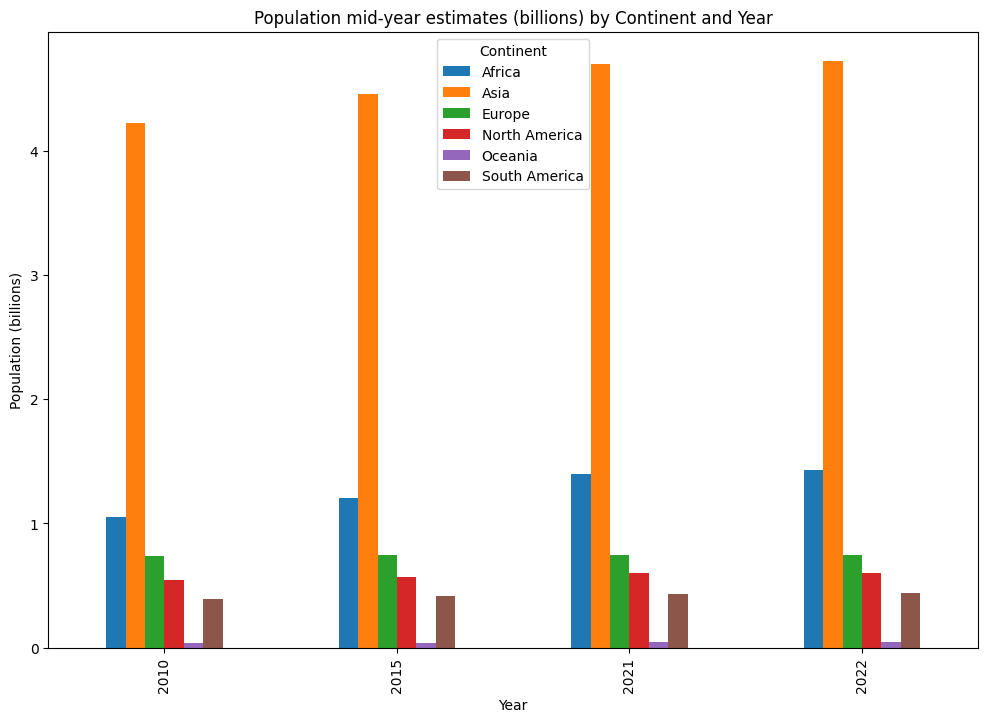

In [ ]:
# Data is now combined into a single DataFrame
world_continents = pd.concat([africa, asia, europe, northamerica, oceania, southamerica])

# As before, converts 'Value' from millions to billions
world_continents['Value'] = world_continents['Value'] / 1000

# Pivots combined data to have 'Year' as the index and 'Region/Country/Area' as columns;
# 'Values' is the actual population figures
world_continents = world_continents.pivot(index='Year', columns='Region/Country/Area', values='Value')

# Plots the data
world_continents.plot(kind='bar', figsize=(12, 8))
plt.title('Population mid-year estimates (billions) by Continent and Year')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.legend(title='Continent')
plt.show()

I want to find out what exactly the above default colours are that Matplotlib has assigned for each continent.
This will come in handy in due course.
https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html#colors-color-cycles-and-colormaps 
and https://www.statology.org/matplotlib-default-colors list Matplotlib's default 10 colours:

In [ ]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
#1f77b4: Africa - Blue
#ff7f0e: Asia - Orange
#2ca02c: Europe - Green
#d62728: North America - Red
#9467bd: Oceania - Purple
#8c564b: South America - Brown

#The remaining four colours were not used.

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Next step is to show the percentages of population increase for each continent. In order to do this, we first need to list just the populations for each of the four years for each continent, and put the figures in an array. From there, we can find the mean population increase for the four years.

In [196]:
# Gets the population for Africa for each of the four years
africa_population_2010 = df1[(df1['Region/Country/Area'] == 'Africa') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

africa_population_2015 = df1[(df1['Region/Country/Area'] == 'Africa') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

africa_population_2021 = df1[(df1['Region/Country/Area'] == 'Africa') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

africa_population_2022 = df1[(df1['Region/Country/Area'] == 'Africa') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

#Array of population figures
africa_population = np.array([africa_population_2010, 
                              africa_population_2015, 
                              africa_population_2021, 
                              africa_population_2022])

#Then calculate the mean
africa_population_mean = np.mean(africa_population)

#Calculate the percentage increase for each of the consecutive years
africa_increase_2010_2015 = ((africa_population_2015 - africa_population_2010) / africa_population_2010) * 100
africa_increase_2015_2021 = ((africa_population_2021 - africa_population_2015) / africa_population_2015) * 100
africa_increase_2021_2022 = ((africa_population_2022 - africa_population_2021) / africa_population_2021) * 100

#Produces the average percentage increase over the four years
africa_average_percentage_increase = np.mean([africa_increase_2010_2015, 
                                              africa_increase_2015_2021, 
                                              africa_increase_2021_2022])

#Rounds decimal to two places
africa_population_percentage_increase = np.round(africa_average_percentage_increase, 2)

print(f"The mean population of Africa for the years 2010, 2015, 2021, and 2022 was: {africa_population_mean}")
print(f"The percentage increase in the population of Africa for the years 2010, 2015, 2021, and 2022 was: {africa_population_percentage_increase}%")


# Now repeat the same step for other continents:

#Asia

asia_population_2010 = df1[(df1['Region/Country/Area'] == 'Asia') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

asia_population_2015 = df1[(df1['Region/Country/Area'] == 'Asia') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

asia_population_2021 = df1[(df1['Region/Country/Area'] == 'Asia') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

asia_population_2022 = df1[(df1['Region/Country/Area'] == 'Asia') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

asia_population = np.array([asia_population_2010, 
                            asia_population_2015, 
                            asia_population_2021, 
                            asia_population_2022])

asia_population_mean = np.mean(asia_population)

asia_increase_2010_2015 = ((asia_population_2015 - asia_population_2010) / asia_population_2010) * 100
asia_increase_2015_2021 = ((asia_population_2021 - asia_population_2015) / asia_population_2015) * 100
asia_increase_2021_2022 = ((asia_population_2022 - asia_population_2021) / asia_population_2021) * 100

asia_average_percentage_increase = np.mean([asia_increase_2010_2015, 
                                            asia_increase_2015_2021, 
                                            asia_increase_2021_2022])
asia_population_percentage_increase = np.round(asia_average_percentage_increase, 2)

print(f"The mean population of Asia for the years 2010, 2015, 2021, and 2022 was: {asia_population_mean}")
print(f"The percentage increase in the population of Asia for the years 2010, 2015, 2021, and 2022 was: 
      {asia_population_percentage_increase}%")

 #Europe

europe_population_2010 = df1[(df1['Region/Country/Area'] == 'Europe') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

europe_population_2015 = df1[(df1['Region/Country/Area'] == 'Europe') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

europe_population_2021 = df1[(df1['Region/Country/Area'] == 'Europe') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

europe_population_2022 = df1[(df1['Region/Country/Area'] == 'Europe') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

europe_population = np.array([europe_population_2010, 
                              europe_population_2015, 
                              europe_population_2021, 
                              europe_population_2022])

europe_population_mean = np.mean(europe_population)

europe_increase_2010_2015 = ((europe_population_2015 - europe_population_2010) / europe_population_2010) * 100
europe_increase_2015_2021 = ((europe_population_2021 - europe_population_2015) / europe_population_2015) * 100
europe_increase_2021_2022 = ((europe_population_2022 - europe_population_2021) / europe_population_2021) * 100

europe_average_percentage_increase = np.mean([europe_increase_2010_2015, 
                                              europe_increase_2015_2021, 
                                              europe_increase_2021_2022])

europe_population_percentage_increase = np.round(europe_average_percentage_increase, 2)

print(f"The mean population of Europe for the years 2010, 2015, 2021, and 2022 was: {europe_population_mean}")
print(f"The percentage increase in the population of Europe for the years 
      2010, 2015, 2021, and 2022 was: {europe_population_percentage_increase}%")

#North America

northamerica_total = df1[
                        (
                              (df1['Region/Country/Area'] == 'Northern America') |
                              (df1['Region/Country/Area'] == 'Caribbean') |
                              (df1['Region/Country/Area'] == 'Central America')  
                        ) & 
                        (df1['Series'] == 'Population mid-year estimates (millions)')
              ]


northamerica = northamerica_total.groupby('Year')['Value'].sum().reset_index()

northamerica['Region/Country/Area'] = 'North America'
northamerica['Series'] = 'Population mid-year estimates (millions)'

northamerica = northamerica[['Region/Country/Area', 'Year', 'Series', 'Value']]

# Concatenate 'northamerica' DataFrame with original 'df1' DataFrame
df1 = pd.concat([df1, northamerica], ignore_index=True)

northamerica_population_2010 = df1[(df1['Region/Country/Area'] == 'North America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

northamerica_population_2015 = df1[(df1['Region/Country/Area'] == 'North America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

northamerica_population_2021 = df1[(df1['Region/Country/Area'] == 'North America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

northamerica_population_2022 = df1[(df1['Region/Country/Area'] == 'North America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

#NumPy array of population values
northamerica_population = np.array([northamerica_population_2010, 
                                    northamerica_population_2015, 
                                    northamerica_population_2021, 
                                    northamerica_population_2022])

#Calculate population for the specified years and rounds to two decimal places
northamerica_population_mean = np.mean(northamerica_population)
northamerica_population_mean_rounded = np.round(northamerica_population_mean, 2)

#Calculate percentage increase in population for periods 2010-2015, 2015-2021, and 2021-2022.
northamerica_increase_2010_2015 = ((northamerica_population_2015 - northamerica_population_2010) / northamerica_population_2010) * 100
northamerica_increase_2015_2021 = ((northamerica_population_2021 - northamerica_population_2015) / northamerica_population_2015) * 100
northamerica_increase_2021_2022 = ((northamerica_population_2022 - northamerica_population_2021) / northamerica_population_2021) * 100

#Calculate average of percentage increases and round result to two decimal places
northamerica_average_percentage_increase = np.mean([northamerica_increase_2010_2015, 
                                                    northamerica_increase_2015_2021, 
                                                    northamerica_increase_2021_2022])

northamerica_population_percentage_increase = np.round(northamerica_average_percentage_increase, 2)

print(f"The mean population of North America for the years 
      2010, 2015, 2021, and 2022 was: {northamerica_population_mean_rounded}")
print(f"The percentage increase in the population of North America for the years 
      2010, 2015, 2021, and 2022 was: {northamerica_population_percentage_increase}%")

#Oceania

oceania_population_2010 = df1[(df1['Region/Country/Area'] == 'Oceania') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

oceania_population_2015 = df1[(df1['Region/Country/Area'] == 'Oceania') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

oceania_population_2021 = df1[(df1['Region/Country/Area'] == 'Oceania') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

oceania_population_2022 = df1[(df1['Region/Country/Area'] == 'Oceania') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

oceania_population = np.array([oceania_population_2010, 
                               oceania_population_2015, 
                               oceania_population_2021, 
                               oceania_population_2022])

oceania_population_mean = np.mean(oceania_population)

oceania_increase_2010_2015 = ((oceania_population_2015 - oceania_population_2010) / oceania_population_2010) * 100
oceania_increase_2015_2021 = ((oceania_population_2021 - oceania_population_2015) / oceania_population_2015) * 100
oceania_increase_2021_2022 = ((oceania_population_2022 - oceania_population_2021) / oceania_population_2021) * 100

oceania_average_percentage_increase = np.mean([oceania_increase_2010_2015, 
                                               oceania_increase_2015_2021,
                                               oceania_increase_2021_2022])

oceania_population_percentage_increase = np.round(oceania_average_percentage_increase, 2)

print(f"The mean population of Oceania for the years 
      2010, 2015, 2021, and 2022 was: {oceania_population_mean}")
print(f"The percentage increase in the population of Oceania for the years 
      2010, 2015, 2021, and 2022 was: {oceania_population_percentage_increase}%")

#South America

southamerica_population_2010 = df1[(df1['Region/Country/Area'] == 'South America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2010)
            ]['Value'].values[0]

southamerica_population_2015 = df1[(df1['Region/Country/Area'] == 'South America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2015)
            ]['Value'].values[0]

southamerica_population_2021 = df1[(df1['Region/Country/Area'] == 'South America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2021)
            ]['Value'].values[0]

southamerica_population_2022 = df1[(df1['Region/Country/Area'] == 'South America') & 
             (df1['Series'] == 'Population mid-year estimates (millions)') &
             (df1['Year'] == 2022)
            ]['Value'].values[0]

southamerica_population = np.array([
                              southamerica_population_2010, southamerica_population_2015, 
                              southamerica_population_2021, southamerica_population_2022])

southamerica_population_mean = np.mean(southamerica_population)

southamerica_increase_2010_2015 = ((southamerica_population_2015 - southamerica_population_2010) / southamerica_population_2010) * 100
southamerica_increase_2015_2021 = ((southamerica_population_2021 - southamerica_population_2015) / southamerica_population_2015) * 100
southamerica_increase_2021_2022 = ((southamerica_population_2022 - southamerica_population_2021) / southamerica_population_2021) * 100

southamerica_average_percentage_increase = np.mean([southamerica_increase_2010_2015, 
                                                    southamerica_increase_2015_2021, 
                                                    southamerica_increase_2021_2022])
southamerica_population_percentage_increase = np.round(southamerica_average_percentage_increase, 2)

print(f"The mean population of South America for the years 
      2010, 2015, 2021, and 2022 was: {southamerica_population_mean}")
print(f"The percentage increase in the population of South America for the years 
      2010, 2015, 2021, and 2022 was: {southamerica_population_percentage_increase}%")


SyntaxError: unterminated string literal (detected at line 45) (3935643891.py, line 45)

Plot the data in Seaborn.

In [ ]:
# List of continents
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
#List of continent population increase percentages from 2010-2022
percentages = [africa_population_percentage_increase, asia_population_percentage_increase, 
                europe_population_percentage_increase, northamerica_population_percentage_increase, 
                oceania_population_percentage_increase, southamerica_population_percentage_increase]

#Pandas DataFrame is created with 'Continent' and 'Percentage Increase' columns, 
#populated with data from the 'continents' and 'percentage' lists above
population_data = pd.DataFrame({'Continent': continents, 'Percentage Increase': percentages})

#Utilization of default Matplotlib colour pallettes from previous plot, as covered previously,
#so that continents retain exact same colour 
colour_palette = {
    'Africa': '#1f77b4', #Blue
    'Asia': '#ff7f0e', #Orange
    'Europe': '#2ca02c', #Green
    'North America': '#d62728', #Red
    'Oceania': '#9467bd', #Purple
    'South America': '#8c564b' #Brown
}

#Creates a list that contains the mapped colour for each continent
colours = [colour_palette[continent] for continent in continents]

#Plot the data
plt.figure(figsize = (12, 8))
#Seaborn's barplot function
#Hue parameter set to 'Continent', so that each bar will be coloured according to the 'colour_palette' dictionary
#Legend set to false so that one is not included
bar_plot = sns.barplot(x = 'Continent', y = 'Percentage Increase', hue = 'Continent', 
                       data = population_data, palette = colour_palette, legend = False)

#Adjusting y-axis limits
#Finds maximum percentage increase from 'percentages' list, then sets y-axis limit from 0 to
#whatever max_percentage is set at
max_percentage = max(percentages)
plt.ylim(0, max_percentage + 3) #Adds more space to fit the percentage displayed for Africa inside the plot area

bar_plot.set_xlabel('Continent')
bar_plot.set_ylabel('Average Percentage Increase')
bar_plot.set_title('Average Percentage Increase in Population By Continent (2010-2022)')

#Iterates over each continent and its corresponding percentage increase from 'population_data' DataFrame
#Zip function pairs each together
#bar_plot.text adds text to plot
#tolist() converts 'Continent' column into list
#index(continent) finds index of current continent in list
#percentage + 0.4 orientates percentage for each continent above column
#ha = 'center' aligns text on x-axis
for continent, percentage in zip(population_data['Continent'], population_data['Percentage Increase']):
    bar_plot.text(population_data['Continent'].tolist().index(continent), percentage + 0.4, f"{percentage}%",
           ha = 'center', fontweight = 'bold')       
plt.show()

NameError: name 'africa_population_percentage_increase' is not defined

Next step is to focus on countries:
we need to add a column that confirms whether the entry is a soverign nation-state or not, thus filtering outliers like 
overseas territories, continents, sub-continents / regions, cultural groupings (e.g. 'Latin America'), and UN groupings 
such as LLDCs, LDCs, and SIDs that appear in the data (more on this in PowerPoint presentation):

In [ ]:
# Initialize column
df1['Sovereign nation-state'] = None

#List of soverign nation-states
#NB. Some disputed territories (Kosovo, Taiwan) not included in data. I have kept Palestine in despite being disputed
#Double-quotation marks for sovereign nation-states required because of single-quotation marks in Côte d'Ivoire and Lao People's Dem. Rep
sovereign_nations = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia (Plurin. State of)", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei Darussalam", "Bulgaria", 
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", 
    "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Côte d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", 
    "Dem. People's Rep. Korea", "Dem. Rep. of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", 
    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", 
    "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", 
    "Guyana", "Haiti", "Holy See", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran (Islamic Republic of)", 
    "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", 
    "Kyrgyzstan", "Lao People's Dem. Rep.", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", 
    "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", 
    "Mauritius", "Mexico", "Micronesia (Fed. States of)", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", 
    "Namibia", "Nauru", "Nepal", "Netherlands (Kingdom of the)", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal",
    "Qatar", "Republic of Korea", "Republic of Moldova", "Romania", "Russian Federation", "Rwanda", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent & Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", 
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", 
    "South Sudan", "Spain", "Sri Lanka", "State of Palestine", "Sudan", "Suriname", "Sweden", "Switzerland", "Syrian Arab Republic", 
    "Tajikistan", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Türkiye", "Turkmenistan", 
    "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United Rep. of Tanzania", "United States of America",
    "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela (Boliv. Rep. of)", "Viet Nam", "Yemen", "Zambia", "Zimbabwe"
]

# Update the 'Sovereign nation-state' column accordingly via lambda
df1['Sovereign nation-state'] = df1['Region/Country/Area'].apply(lambda x: 'Yes' if x in sovereign_nations else 'No')


In [ ]:
df1.sample(10)

,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source
5502,598,Papua New Guinea,2022,Population aged 60+ years old (percentage),5.50,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
29,2,Africa,2010,Population mid-year estimates (millions),1055.23,NaN,"United Nations Population Division, New York, ..."
6086,882,Samoa,2021,Population aged 0 to 14 years old (percentage),37.70,NaN,"United Nations Population Division, New York, ..."
570,145,Western Asia,2010,Population density,49.80,NaN,"United Nations Population Division, New York, ..."
837,57,Micronesia,2015,Population aged 60+ years old (percentage),8.90,"Including Marshall Islands, Nauru, Northern Ma...","United Nations Population Division, New York, ..."
4450,458,Malaysia,2010,Sex ratio (males per 100 females),106.20,Including Sabah and Sarawak.,"United Nations Population Division, New York, ..."
6427,90,Solomon Islands,2015,Population aged 0 to 14 years old (percentage),40.50,NaN,"United Nations Population Division, New York, ..."
23,1,"Total, all countries or areas",2022,Population mid-year estimates for males (milli...,4008.58,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7467,876,Wallis and Futuna Islands,2022,Population mid-year estimates for males (milli...,0.01,Projected estimate (medium fertility variant)....,"United Nations Population Division, New York, ..."
6221,688,Serbia,2015,Population mid-year estimates for males (milli...,3.61,Excluding Kosovo.,"United Nations Population Division, New York, ..."


In [ ]:
df1_sovereignstates = df1[(df1['Sovereign nation-state'] == 'Yes') &
                          (df1['Series'] == 'Population mid-year estimates (millions)')]
df1_sovereignstates.head()

,LocationID,Region/Country/Area,Year,Series,Value,Footnotes,Source,Sovereign nation-state
883,4.0,Afghanistan,2010,Population mid-year estimates (millions),28.19,None,"United Nations Population Division, New York, ...",Yes
890,4.0,Afghanistan,2015,Population mid-year estimates (millions),33.75,None,"United Nations Population Division, New York, ...",Yes
897,4.0,Afghanistan,2021,Population mid-year estimates (millions),40.10,None,"United Nations Population Division, New York, ...",Yes
905,4.0,Afghanistan,2022,Population mid-year estimates (millions),41.13,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ...",Yes
912,8.0,Albania,2010,Population mid-year estimates (millions),2.91,None,"United Nations Population Division, New York, ...",Yes


First, though, we will once again filter the rows for sovereign nation-states so that it only shows the overall population data, 
but this time will only display data filtered for the latest year in the DataFrame (2022), so as to visualize comparisons of population sizes 
of all sovereign-nation states interactively.  

In [ ]:
# Bokeh scatter plot
#Inspired by plots such as this, even if the end result is still quite different:
#https://docs.bokeh.org/en/latest/docs/examples/basic/scatters/elements.html

#Output to notebook
output_notebook()

#Filter for sovereign nation-states only and for overall population figures only for year 2022
df1_sovereignstates = df1[(df1['Sovereign nation-state'] == 'Yes') &
                          (df1['Series'] == 'Population mid-year estimates (millions)') &
                          (df1['Year'] == 2022)].copy()

#Drop duplicates to keep only the first row for each sovereign nation-state, focusing on overall population
df1_sovereignstates = df1_sovereignstates.drop_duplicates(subset='Region/Country/Area', keep='first')

#Round down the population figures to three digits after the decimal (important for India and China)
df1_sovereignstates['Value'] = df1_sovereignstates['Value'].round(3)

#print(df1_sovereignstates.columns)

#Calculate scaled population with increased factor for larger circles
scaling_factor = 140 # Makes circles bigger proportionally while ensuring they don't blur into each other
df1_sovereignstates['Scaled Population'] = df1_sovereignstates['Value'] / df1_sovereignstates['Value'].max() * scaling_factor

#Create ColumnDataSource
source = ColumnDataSource(df1_sovereignstates)

#Create figure with adjusted size and zoom tools
p = figure(title = "World Population (2022) interactive (mouse over each circle for data)",
           x_range = FactorRange(*df1_sovereignstates['Region/Country/Area']),
           #FactorRange used to specify that x-axis should be a categorical dimension 
           #(in this case all sovereign nation-states) rather than continuous numerical variables.
           #The values in the series df1_sovereignstates are unpacked into individual arguments
           #via the FactorRange constructor. Every sovereign nation-state is treated as a 
           #separate category
           x_axis_label = 'Country',
           y_axis_label = 'Population (millions)',
           tools = "pan,wheel_zoom,box_zoom,reset,save",
           width = 1200,
           height = 800)

#Add scatter plot with scaled sizes
p.scatter(x = 'Region/Country/Area',
          y = 'Value',
          size = 'Scaled Population', #size of circles based on 'Scaled Population' column in DataFrame
          source = source,
          fill_alpha = 0.6,
          line_color = None)

#Add line plot to connect the points (Bokeh slope)
p.line(x='Region/Country/Area', y='Value', source=source, line_width=2, line_alpha=0.6)

#Add hover tool with formatted tooltips
hover = HoverTool()
hover.tooltips = [("Country", "@{Region/Country/Area}"), ("Population", "@{Value}{0.000}")] 
#formats country and population when user hovers; population statistic can display up to three places after the decimal
p.add_tools(hover)

#Hide x-axis labels (each sovereign nation-state), as they appear in tooltip when users mouse over circles anyway
p.xaxis.major_label_text_font_size = '0pt'

#Set the wheel zoom as the active scroll tool
p.toolbar.active_scroll = p.select_one('wheel_zoom')

show(p)

Loading BokehJS ...

In [ ]:
# Calcuates the mean and percentage of population increase of every sovereign nation-state in the world over the four given years
# without having to list each country manually, as I did with the continents in the equivalent code above

df1_filtered_for_percent = df1[(df1['Series'] == 'Population mid-year estimates (millions)') &
                  (df1['Sovereign nation-state'] == 'Yes')]

df1_sovnations_popincrease_percent = df1_filtered_for_percent.pivot(
    index='Region/Country/Area', columns='Year', values='Value')

df1_sovnations_popincrease_percent['Mean Country Population'] = df1_sovnations_popincrease_percent.mean(axis=1)

df1_sovnations_popincrease_percent['Increase 2010-2015'] = (
    (df1_sovnations_popincrease_percent[2015] - df1_sovnations_popincrease_percent[2010])
    / df1_sovnations_popincrease_percent[2010]) * 100
df1_sovnations_popincrease_percent['Increase 2015-2021'] = (
    (df1_sovnations_popincrease_percent[2021] - df1_sovnations_popincrease_percent[2015])
    / df1_sovnations_popincrease_percent[2015]) * 100
df1_sovnations_popincrease_percent['Increase 2021-2022'] = (
    (df1_sovnations_popincrease_percent[2022] - df1_sovnations_popincrease_percent[2021]) 
    / df1_sovnations_popincrease_percent[2021]) * 100


df1_sovnations_popincrease_percent['Average Country Population Percentage Increase'] = df1_sovnations_popincrease_percent[[
'Increase 2010-2015', 
'Increase 2015-2021', 
'Increase 2021-2022']].mean(axis=1)

df1_sovnations_popincrease_percent = df1_sovnations_popincrease_percent.reset_index()

df1_sovnations_popincrease_percent['Average Country Population Percentage Increase'] = (
    df1_sovnations_popincrease_percent['Average Country Population Percentage Increase']
    .round(2)
)

df1_sovnations_popincrease_percent.head()


Year,Region/Country/Area,2010,2015,2021,2022,Mean Country Population,Increase 2010-2015,Increase 2015-2021,Increase 2021-2022,Average Country Population Percentage Increase
0,Afghanistan,28.19,33.75,40.10,41.13,35.7925,19.723306,18.814815,2.568579,13.70
1,Albania,2.91,2.88,2.85,2.84,2.8700,-1.030928,-1.041667,-0.350877,-0.81
2,Algeria,35.86,39.54,44.18,44.90,41.1200,10.262131,11.734952,1.629697,7.88
3,Andorra,0.07,0.07,0.08,0.08,0.0750,0.000000,14.285714,0.000000,4.76
4,Angola,23.36,28.13,34.50,35.59,30.3950,20.419521,22.644863,3.159420,15.41


In [ ]:
# Select the necessary two columns for plot
df1_sovnations_popincrease_percent = df1_sovnations_popincrease_percent[[
    'Region/Country/Area', 'Average Country Population Percentage Increase']]

#Sorts sovereign nation-states this time by percentage (increase left to right),
#not alphabetically, so can appear as a slope
df1_sovnations_popincrease_percent = df1_sovnations_popincrease_percent.sort_values(by='Average Country Population Percentage Increase')

#Create ColumnDataSource
source = ColumnDataSource(df1_sovnations_popincrease_percent)

#Linear equation parameters
slope, intercept = 2, 10

blue, yellow = Sunset10[0], Sunset10[5]

p = figure(
            title = "Population growth of countries by percentage (2010-2022), interactive (mouse over each circle for data)",
            x_range = FactorRange(*df1_sovnations_popincrease_percent['Region/Country/Area']),
            width = 1000,
            height = 600, 
            x_axis_label = 'Country', 
            y_axis_label = 'Population Percent Increase',
            background_fill_color = "#fafafa"
        )

#Ensure that the y-axis starts at -10, to account for sovereign nation-states with a 
#minus percentage of population growth
p.y_range.start = -10

#Add scatter points
p.scatter(  'Region/Country/Area', 
            'Average Country Population Percentage Increase', 
            # size = 'Scaled Population',
            size = 12,
            alpha = 0.8, 
            fill_color = yellow, 
            source = source,
            line_color = "black")

slope_line = Slope(
            gradient = slope, 
            y_intercept = intercept,
            line_color = blue, 
            line_dash = 'dashed', 
            line_width = 4)

p.add_layout(slope_line)


#Add hover tool with formatted tooltips
hover = HoverTool()
hover.tooltips = [
    ("Country", "@{Region/Country/Area}"), 
    ("Percentage", "@{Average Country Population Percentage Increase}{0.00}%")
    ]
p.add_tools(hover)

#As with previous Bokeh plot, hide x-axis labels (each sovereign nation-state), 
# as they appear in tooltip when users mouse over circles anyway
p.xaxis.major_label_text_font_size = '0pt'

p.toolbar.active_scroll = p.select_one('wheel_zoom')

show(p)

NameError: name 'df1_sovnations_popincrease_percent' is not defined